In [4]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/content/train.csv')
df.head(5)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


# 데이터 탐색 및 전처리

- 1)train_lunch,train_dinner
- 2)test_lunch, test_dinner
- 3)전체합쳐진 데이터
- 총 6개 csv파일로 저장을 해두었다.

-하나의 데이터로해주면 되지만, 점도 직관적으로 보기위해 나누어줬다
-그리고 test에 'none'값을 없애주면 다른 행들도 사라지기 때문에 따로 나누어서 저장해준 뒤에 
-나중에 학습을 할때 'None'값만 없애주고 학습을 하기위해 데이터들을 나누어주었다.

-------------------------------------------------------------------

# 1))train_lunch,train_dinner

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [7]:
df.corr()
#중식계, 석식계가 상관관계가 있다(상관곤계가 있다고 인과관계는 될수없지만,
#점심에도 먹은 사람은 저녁에도 먹을 가능성이 크다고 생각. 점심때 밖에서 먹지 않은 사람들은 시간을 효율적으로 쓰고 싶어하거나
#음식에 대해 딱히 관심이 없을수도있다생각. 그냥 살기위해 먹는 사람들일수도 있다 생각.)

#그래서 이 사람들은 시간이 가장 중요하다 생각.
#그래도 너무 맛이없으면 밖에서 사먹을 수도 있다는게 두번째 가설. 보통 음식은 밥, 국 , 메인반찬이 중요하므로
#음식이 너무 맛이없지않는한 웬만하면 구내식당을 이용할거라 예측.

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_

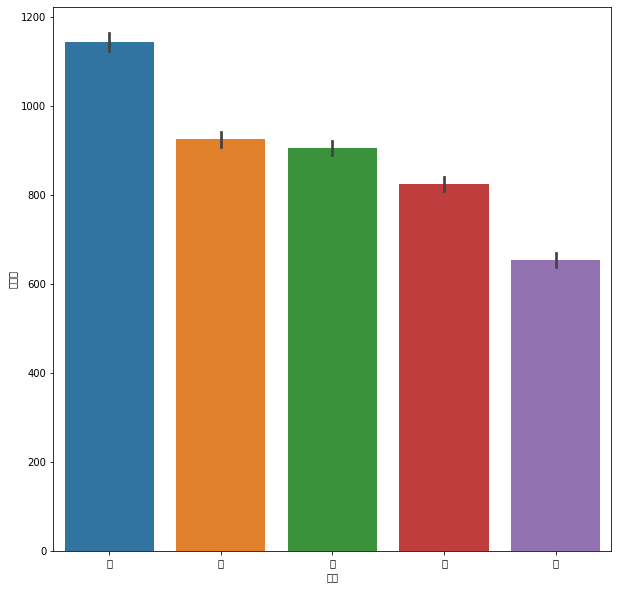

In [8]:
plt.figure(figsize=(10,10))


sns.barplot(x="요일", y="중식계", data=df)
plt.show()

#월요일이 가장 많고 금요일로 갈수록 줄어든다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_

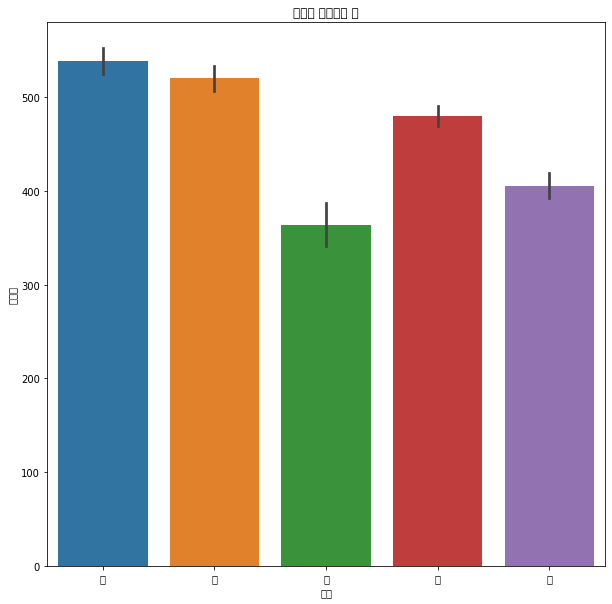

In [9]:
plt.figure(figsize=(10,10))


sns.barplot(x="요일", y="석식계", data=df)
plt.title("요일별 점시시간 수")
plt.show()

#수요일 금요일이 가장 적은데
#그이유는 수요일날 한번 쉬는 의미에서 약속이 많을수 있다 생각.
#금요일 역시 약속이 있어서 나가서 먹을거라 생각
#=> 월,화,목 일 열심히 // 수,금은 좀 힘들어서 쉬는시간 필요하다 생각.

In [10]:
print(df['본사정원수'].max()) #총인원 3305
print('\n')
print(df['중식계'].describe()) #최대 1459
print('\n')
print(df['석식계'].describe()) #최대 905


3305


count    1205.000000
mean      890.334440
std       209.505057
min       296.000000
25%       758.000000
50%       879.000000
75%      1032.000000
max      1459.000000
Name: 중식계, dtype: float64


count    1205.000000
mean      461.772614
std       139.179202
min         0.000000
25%       406.000000
50%       483.000000
75%       545.000000
max       905.000000
Name: 석식계, dtype: float64


# 데이터 정리

In [11]:
df.columns = ['date','day','numbers','dayoff','work','outsidework','workfhome','break','lunch','dinner','lunch_t','dinner_t']
df.head(2) #제목이 오타도 날수있어서 영어로바꾸어주었다.

,date,day,numbers,dayoff,work,outsidework,workfhome,break,lunch,dinner,lunch_t,dinner_t
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


## 날짜 정리

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y%m')

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m%d')

In [14]:
df['Month'] = df['date'].str[0:2]
df['Date'] = df['date'].str[2:]
df.drop(['date','break'], inplace=True , axis=1) 

df.head(2)

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,yearmonth,Month,Date
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,201602,02,01
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,201602,02,02


In [15]:
df.drop('yearmonth', inplace=True , axis=1)

## 메뉴들 나우어 주기

In [16]:
# 일별 점심메뉴를 작은 리스트로 갖고 있는 큰 리스트 (lunch) 만들기 
lunch_menu = []

for day in range(len(df)):
    tmp = df.loc[day,'lunch'].split(' ') 
    tmp = ' '.join(tmp).split()  
    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    lunch_menu.append(tmp) 

In [17]:
for bob in range(len(df)): 
    if '쌀밥' in lunch_menu[bob][0]:
        lunch_menu[bob][0] = '밥'

In [18]:
lunch_menu[0][0]

'밥'

In [19]:
df['lunch_menu'] = lunch_menu
df.head(2)

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,Month,Date,lunch_menu
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02,01,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]"
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,02,02,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]"


In [20]:
# 위에서 언급한 메인, 국, 반찬만 나누어주기

bob=[]
soup=[]
main1=[]
main2=[]
main3=[]
for i in range(len(df)):
    if lunch_menu[i][0]:
        bob.append(lunch_menu[i][0])
    if lunch_menu[i][1]:
        soup.append(lunch_menu[i][1])
    if lunch_menu[i][2]:
        main1.append(lunch_menu[i][2])
    if lunch_menu[i][3]:
        main2.append(lunch_menu[i][3])    
    if lunch_menu[i][4]:
        main3.append(lunch_menu[i][4])

In [21]:
#누락이 있으면 안되므로 확인해주자

print(len(bob))
print(len(soup))
print(len(main1))
print(len(main2))
print(len(main3))
print('--')
print(len(df))

1205
1205
1205
1205
1205
--
1205


In [22]:
#확인후에 추가
df['bob'] = bob
df['soup'] = soup
df['main1'] = main1
df['main2']= main2
df['main3'] = main3

In [23]:
df.head(2) 

,day,numbers,dayoff,work,outsidework,workfhome,lunch,dinner,lunch_t,dinner_t,Month,Date,lunch_menu,bob,soup,main1,main2,main3
0,월,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,02,01,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]",밥,오징어찌개,쇠불고기,계란찜,청포묵무침
1,화,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,02,02,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]",밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침


In [24]:
df['bob'].value_counts() #밥은 딱히 영향이 없을것같다.

밥              1003
콩나물밥             23
카레덮밥             18
나물비빔밥            15
곤드레밥*강된장         12
단호박영양밥           10
김치제육덮밥            8
카레라이스             8
비빔밥               8
곤드레밥              8
곤드레밥*양념장          8
낙지비빔밥             6
짜장덮밥              6
마파두부덮밥            5
산채비빔밥             5
콩나물밥*양념장          5
짜장밥               4
열무보리비빔밥           4
열무비빔밥             3
소불고기덮밥            3
봄나물비빔밥            3
참치회덮밥             2
<초복특식>            2
곤드레밥*간장양념         2
단호박카레라이스          2
콩나물밥*달래장          2
파인애플볶음밥           1
건강비빔밥*약고추장        1
불고기덮밥             1
연복풍덮밥             1
낙지비빔밥*계란후라이       1
버섯영양밥             1
김치필라프             1
베이컨김치볶음밥          1
봄새싹비빔밥            1
열무보리비빔밥/강된장       1
오곡밥               1
산채비빔밥*강된장         1
고기듬뿍카레라이스         1
김치볶음밥             1
오므라이스             1
전주비빔밥*약고추장        1
삼계탕               1
김밥볶음밥             1
소고기콩나물밥*양념        1
불고기비빔밥            1
계란채소볶음밥           1
비빔밥*약고추장          1
전주비빔밥             1
새우날치알볶음밥          1


In [25]:
df['soup'].value_counts()

맑은국       46
콩나물국      44
된장찌개      37
어묵국       31
배추된장국     28
          ..
들깨수제비      1
매운쇠고기국     1
어묵매운탕      1
우묵콩국       1
건새우무채국     1
Name: soup, Length: 272, dtype: int64

In [26]:
df['main1'].value_counts()

오징어볶음        32
닭갈비          30
버섯불고기        29
훈제오리구이       27
돈육굴소스볶음      25
             ..
꽁치김치말이찜       1
수원왕갈비         1
해물잡채          1
완자전           1
알리오올리오파스타     1
Name: main1, Length: 391, dtype: int64

In [27]:
df['main2'].value_counts()

계란말이           27
계란찜            24
새송이버섯전         24
메추리알조림         18
우엉잡채           18
               ..
수제두부까스&하이소스     1
생선까스*타르소스       1
멸치볶음            1
김치제육볶음          1
깐풍연근            1
Name: main2, Length: 465, dtype: int64

In [28]:
df['main3'].value_counts()

오이무침         34
콩나물무침        28
숙주나물         24
무생채          22
시금치나물        19
             ..
상추/쑥갓쌈&쌈장     1
도라지무침         1
연근유자피클        1
통오이고추무침       1
무비트생채         1
Name: main3, Length: 447, dtype: int64

In [59]:
!pip install xmltodict





api_key="bq2WYbngBO1Sgq7gzdrxTGpWEhpbjcJJnKJL5Ub3hehk8GAUML0LmF0Ej%2FqOBRorlJ3aztDjmW%2FlLYJtx1y7xA%3D%3D"


import requests, xmltodict
for i in df["main1"]:
  url="http://apis.data.go.kr/1390802/AgriFood/MzenFoodCode/getKoreanFoodList?serviceKey={0}&Page_No=1&Page_Size=30&food_Group_Code=&food_Name={1}".format(api_key,i)
  content = requests.get(url).content
  dict=xmltodict.parse(content)
  try:
      print(dict)
      print(dict['response']['body']['items']['item'][1]['food_Name'])
      #print(dict['response']['body']['items']['item'][1]['large_Name'])
      #print(dict['response']['body']['items']['item'][0])
  except:
     i=0
     print(i)

OrderedDict([('OpenAPI_ServiceResponse', OrderedDict([('cmmMsgHeader', OrderedDict([('errMsg', 'SERVICE ERROR'), ('returnAuthMsg', 'LIMITED_NUMBER_OF_SERVICE_REQUESTS_EXCEEDS_ERROR'), ('returnReasonCode', '22')]))]))])
0
OrderedDict([('response', OrderedDict([('header', OrderedDict([('result_Code', '200'), ('result_Msg', 'OK')])), ('body', OrderedDict([('rcdcnt', '30'), ('page_No', '1'), ('total_Count', '1'), ('items', OrderedDict([('item', OrderedDict([('food_Code', 'D121001'), ('large_Name', '튀김류'), ('middle_Name', '어패류튀김'), ('food_Name', '가자미튀김'), ('food_Volume', '85')]))]))]))]))])
0
OrderedDict([('response', OrderedDict([('header', OrderedDict([('Result_Code', '301'), ('Result_Msg', '요청 데이터 없음')]))]))])
0
OrderedDict([('OpenAPI_ServiceResponse', OrderedDict([('cmmMsgHeader', OrderedDict([('errMsg', 'SERVICE ERROR'), ('returnAuthMsg', 'LIMITED_NUMBER_OF_SERVICE_REQUESTS_EXCEEDS_ERROR'), ('returnReasonCode', '22')]))]))])
0
OrderedDict([('OpenAPI_ServiceResponse', OrderedDict([('cmm

KeyboardInterrupt: ignored

# 저녁도 바꾸어주자

In [30]:
dinner_menu = []
for day in range(len(df)):
    tmp = df.loc[day,'dinner'].split(' ')
    tmp = ' '.join(tmp).split()    

    for menu in tmp:
        if '(' in menu:
            tmp.remove(menu)
    dinner_menu.append(tmp) 

In [31]:
df['dinner_menu'] = dinner_menu

In [32]:
len(df['dinner_menu'])

1205

In [33]:
dinner_menu[0:5]

[['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치'],
 ['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포기김치'],
 ['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음', '포기김치'],
 ['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포기김치'],
 ['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침', '포기김치']]

In [34]:
print(range(len(df)))
print(range(len(dinner_menu)))

range(0, 1205)
range(0, 1205)


In [35]:
bobd=[]
soupd=[]
main1d=[]
main2d=[]
main3d=[]


for word in  dinner_menu:
    
    
    if len(word) < 4:
      
        bobd.append('None') #비어있으면 그 날짜자체가 없어질수있으므로 'None' 값으로 대체
        soupd.append('None')
        main1d.append('None')
        main2d.append('None')
        main3d.append('None')
    else:
        bobd.append(word[0])
        soupd.append(word[1])
        main1d.append(word[2])
        main2d.append(word[3])
        #main3d.append(word[4])




In [36]:
#다들어왔는지 확인
print(len(dinner_menu))
print(len(bobd))
print(len(soupd))
print(len(main1d))
print(len(main2d))
print(len(main3d))

1205
1205
1205
1205
1205
42


In [37]:
df['bobd'] = bobd
df['soupd'] = soupd
df['main1d'] = main1d
df['main2d'] = main2d

In [38]:
df['main1d'].value_counts()[:10]

None       42
떡볶이        16
닭갈비        16
돈육강정       15
깐풍기        14
돈육굴소스볶음    14
유린기        14
고추잡채*꽃빵    14
돈육장조림      14
주꾸미볶음      13
Name: main1d, dtype: int64

In [39]:
df['soupd'].value_counts()[:10]

None     42
잔치국수     37
맑은국      33
된장찌개     30
가쯔오장국    29
육개장      29
미소장국     28
부대찌개     25
닭개장      23
우동       23
Name: soupd, dtype: int64

In [40]:
# Lunch Train 완성
#lunch_train
train = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','lunch_t','Month','Date','bob','soup','main1','main2']
]


In [41]:
# encoding

train['day'] =  train['day'].astype('category')
train['day'] = train.day.cat.codes


train['bob'] =  train['bob'].astype('category')
train['bob'] = train.bob.cat.codes

train['soup'] =  train['soup'].astype('category')
train['soup'] = train.soup.cat.codes

train['main1'] =  train['main1'].astype('category')
train['main1'] = train.main1.cat.codes


train['main2'] =  train['main2'].astype('category')
train['main2'] = train.main2.cat.codes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [42]:
train['present'] = train['numbers']-train['dayoff']-train['work']-train['outsidework']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,Month,Date,bob,soup,main1,main2,present
0,3,2601,50,150,238,0.0,1039.0,02,01,22,189,236,35,2163
1,4,2601,50,173,319,0.0,867.0,02,02,22,28,8,189,2059
2,2,2601,56,180,111,0.0,1017.0,02,03,49,249,334,379,2254
3,1,2601,104,220,355,0.0,978.0,02,04,22,149,309,233,1922
4,0,2601,278,181,34,0.0,925.0,02,05,22,75,106,364,2108


In [44]:
train.corr() # 밥, 국, 메인 반찬이 약간의 상관관계를 보인다 

,day,numbers,dayoff,work,outsidework,workfhome,lunch_t,bob,soup,main1,main2,present
day,1.000000,0.004999,-0.210219,-0.447183,0.539062,0.028364,0.584193,-0.051779,0.039582,0.033023,-0.047726,-0.327922
numbers,0.004999,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,0.008470,-0.047180,0.063892,0.037608,0.409730
dayoff,-0.210219,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,0.008260,-0.033509,0.022062,0.031488,-0.134040
work,-0.447183,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,0.062909,-0.016055,-0.038943,-0.016484,0.244995
outsidework,0.539062,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,-0.182796,0.078805,0.017750,-0.049402,-0.696646
workfhome,0.028364,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057818,-0.006933,0.029749,0.094333,0.178831
lunch_t,0.584193,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,-0.041401,0.060575,0.041329,-0.006989,-0.290912
bob,-0.051779,0.008470,0.008260,0.062909,-0.182796,-0.057818,-0.041401,1.000000,-0.094330,-0.021443,0.000244,0.169876
soup,0.039582,-0.047180,-0.033509,-0.016055,0.078805,-0.006933,0.060575,-0.094330,1.000000,0.030518,-0.020358,-0.087686
main1,0.033023,0.063892,0.022062,-0.038943,0.017750,0.029749,0.041329,-0.021443,0.030518,1.000000,-0.049663,0.020313


In [45]:
train.to_csv('enco_train_lunch.csv',index=False)

In [46]:
#train_dinner

In [47]:
train = df[
    ['day','numbers','dayoff','work','outsidework','workfhome','dinner_t','Month','Date','bobd','soupd','main1','main2']
]

In [48]:
#train_dinner 데이터 같은 경우에는 'None' 값이 들어가있어서
#제거 해주는게 가장 좋을것같아서 없애줬다.

In [49]:
train = train[~train['bobd'].str.contains("None", na=False, case=False)]

In [50]:
train.head()

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,Month,Date,bobd,soupd,main1,main2
0,월,2601,50,150,238,0.0,331.0,02,01,쌀밥/잡곡밥,육개장,쇠불고기,계란찜
1,화,2601,50,173,319,0.0,560.0,02,02,콩나물밥*양념장,어묵국,가자미튀김,모둠소세지구이
2,수,2601,56,180,111,0.0,573.0,02,03,쌀밥/잡곡밥,청국장찌개,치킨핑거,쫄면야채무침
3,목,2601,104,220,355,0.0,525.0,02,04,미니김밥*겨자장,우동,주꾸미볶음,부추전
4,금,2601,278,181,34,0.0,330.0,02,05,쌀밥/잡곡밥,차돌박이찌개,돈육씨앗강정,우엉잡채


In [51]:
# encoding

train['day'] =  train['day'].astype('category')
train['day'] = train.day.cat.codes


train['bobd'] =  train['bobd'].astype('category')
train['bobd'] = train.bobd.cat.codes

train['soupd'] =  train['soupd'].astype('category')
train['soupd'] = train.soupd.cat.codes

train['main1'] =  train['main1'].astype('category')
train['main1'] = train.main1.cat.codes
train['main2'] =  train['main2'].astype('category')
train['main2'] = train.main2.cat.codes

In [52]:
train['present'] = train['numbers']-train['dayoff']-train['work']-train['outsidework']

In [53]:
train.corr() 

,day,numbers,dayoff,work,outsidework,workfhome,dinner_t,bobd,soupd,main1,main2,present
day,1.000000,0.000102,-0.217487,-0.448799,0.550872,0.027721,0.370679,-0.031897,-0.049018,0.039311,-0.047327,-0.339600
numbers,0.000102,1.000000,0.243856,-0.059332,0.149934,0.458342,-0.233762,0.231978,-0.039282,0.071827,0.033037,0.412905
dayoff,-0.217487,0.243856,1.000000,-0.267198,-0.247660,0.062881,-0.441422,0.094659,0.049927,0.026234,0.029066,-0.124074
work,-0.448799,-0.059332,-0.267198,1.000000,-0.305881,-0.351528,-0.194714,-0.133213,-0.013999,-0.042979,-0.016272,0.242092
outsidework,0.550872,0.149934,-0.247660,-0.305881,1.000000,0.148692,0.577825,0.004591,-0.018117,0.036050,-0.059581,-0.688813
workfhome,0.027721,0.458342,0.062881,-0.351528,0.148692,1.000000,-0.120799,0.353798,-0.051277,0.032199,0.089424,0.195942
dinner_t,0.370679,-0.233762,-0.441422,-0.194714,0.577825,-0.120799,1.000000,-0.124980,0.022774,-0.018055,-0.053261,-0.442325
bobd,-0.031897,0.231978,0.094659,-0.133213,0.004591,0.353798,-0.124980,1.000000,-0.036543,-0.013217,0.022930,0.124536
soupd,-0.049018,-0.039282,0.049927,-0.013999,-0.018117,-0.051277,0.022774,-0.036543,1.000000,-0.003726,0.026630,-0.036091
main1,0.039311,0.071827,0.026234,-0.042979,0.036050,0.032199,-0.018055,-0.013217,-0.003726,1.000000,-0.048204,0.006311


In [54]:
train.to_csv('enco_train_dinner.csv',index=False)